In [175]:
import sys
sys.path.append('..')

In [176]:
%load_ext autoreload
%autoreload 2
from my_code import model as m
from my_code import layers
from my_code import functions as f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data

- generate random file

In [177]:
import random

scores_dict = dict(zip(f.POSSIBLE_AMINOACIDS, list(range(len(f.POSSIBLE_AMINOACIDS)))))

# Generate the file
with open('../data/mock_file.txt', 'w') as file:
    for _ in range(10000):  # Change the number to generate more or fewer lines
        string = ''.join(random.choice(f.POSSIBLE_AMINOACIDS) for _ in range(12))
        score = (sum([scores_dict[amino] for amino in string])/110 - 1)*100 # create a score
        file.write(f'{string}  {score}\n')

- read data

In [178]:
from pennylane import numpy as np
file_path = '../data/mock_file.txt'  # Replace with the actual path to your 'data.txt' file
string_list, number_list = f.read_data_file(file_path)
score_list = np.array(number_list, requires_grad=False)/100
angles_list = np.array([f.string_to_angles(string) for string in string_list], requires_grad=False)

# Print the resulting lists
print("Angles List:", angles_list)
print("Score List:", score_list)
print("shapes:", angles_list.shape, score_list.shape)

Angles List: [[3.4906585  5.58505361 5.23598776 ... 5.58505361 3.4906585  3.4906585 ]
 [4.53785606 4.53785606 0.34906585 ... 2.7925268  5.23598776 0.34906585]
 [4.53785606 3.14159265 4.1887902  ... 3.83972435 0.         2.0943951 ]
 ...
 [6.28318531 0.34906585 5.23598776 ... 1.3962634  2.7925268  4.1887902 ]
 [2.44346095 3.14159265 3.83972435 ... 3.83972435 1.04719755 0.        ]
 [4.53785606 5.93411946 4.53785606 ... 1.3962634  1.74532925 5.58505361]]
Score List: [ 0.1         0.03636364  0.02727273 ...  0.01818182 -0.2
  0.21818182]
shapes: (10000, 12) (10000,)


- create validation data

In [179]:
X, Y, X_validation, Y_validation = f.create_validating_set(angles_list, score_list, percentage=0.1)

data = [X, Y]
data_validation = [X_validation, Y_validation]

Optimization

In [180]:
circuit_layers = [
    layers.angle_preparation(),
    layers.rotation_layer(), 
    layers.CNOTs_layer(), 
    layers.rotation_layer(), 
    layers.CNOTs_layer(),
    layers.rotation_layer(), 
    layers.CNOTs_layer(),
    layers.rotation_layer(), 
    layers.CNOTs_layer(), 
    layers.rotation_layer(), 
    layers.CNOTs_layer(), 
    layers.rotation_layer(), 
    layers.CNOTs_layer(), 
    layers.mesurament(qubits=[0])
]

In [181]:
S = m.score_predictor(
    n_qubits = 12, 
    data = data, 
    # data_validation = data_validation,
    circuit_layers = circuit_layers, 
    batch_size = 10
)

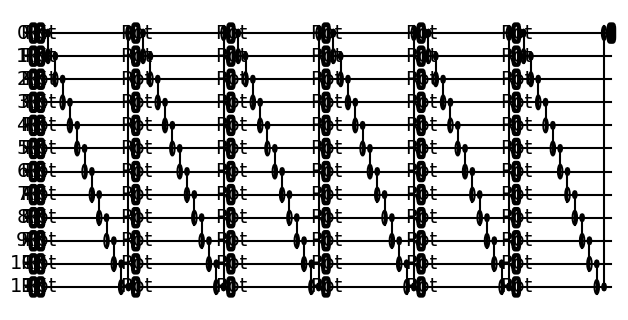

In [182]:
S.draw_circuit()

In [183]:
S.train(100000, plot_options={'accuracy': False, 'accuracy_validation': False})

KeyboardInterrupt: 

In [ ]:
x = np.array(f.string_to_angles('AG'*6), requires_grad=False)
print("Input:", x)
print("Expected score:", (sum([scores_dict[amino] for amino in 'AG'*6])/110 - 1)*100)

Input: [0.         0.34906585 0.         0.34906585 0.         0.34906585
 0.         0.34906585 0.         0.34906585 0.         0.34906585]
Expected score: -94.54545454545455


In [ ]:
print(S.variational_classifier(x, S.params)*100)

-0.9892542016649332
